# complex output regression

In [1]:
import tensorflow as tf
print(tf.config.list_physical_devices())

2023-12-12 13:23:27.047819: I tensorflow/core/util/port.cc:111] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-12-12 13:23:27.126919: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-12 13:23:27.126940: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-12 13:23:27.127538: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-12 13:23:27.230022: I tensorflow/core/platform/cpu_feature_g

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'), PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


2023-12-12 13:23:28.874022: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-12-12 13:23:28.893637: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-12-12 13:23:28.893811: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

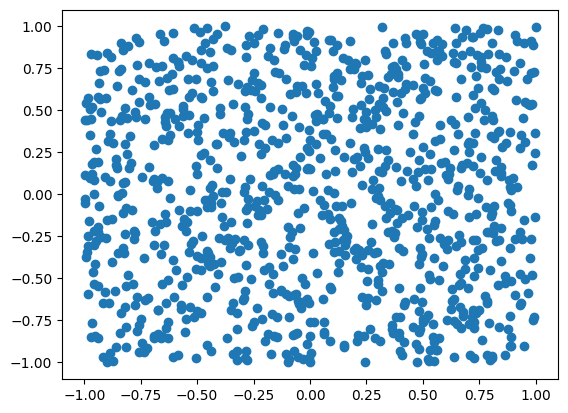

[ 0.97916652-9.21308839e-02j -0.44346479+2.46472813e-01j
  0.32698198+6.08502390e-01j -0.56610366-9.28765649e-01j
  0.26608737+9.79343401e-01j -0.96192651-6.08023610e-01j
  0.32031327-3.56056516e-01j  0.83335698-1.86617442e-01j
  0.16699705-5.44404271e-01j -0.98992341+6.41229047e-01j
  0.39189798+6.87897564e-01j  0.00654969+6.98353168e-01j
  0.00998674-4.28709153e-01j -0.6527956 -2.19069518e-01j
 -0.9059304 -7.57338450e-01j -0.66470423+2.27579775e-01j
 -0.95055903+4.76966826e-01j  0.53850039+8.34222443e-01j
 -0.76230351+4.25986679e-01j  0.4044285 -3.93134684e-01j
 -0.21507182+4.40427264e-02j  0.30346183-2.73091900e-01j
 -0.81473567-8.79282337e-01j -0.94588983-1.32663356e-02j
 -0.12095502-1.09940220e-01j  0.61876883-2.94307927e-01j
  0.35327192-6.57966474e-01j  0.34754656-4.50875520e-01j
 -0.91482951-6.98975591e-02j -0.81964087+8.69508944e-01j
  0.79099482+4.54505497e-01j  0.18684602-3.82291265e-01j
 -0.89844866+6.45718586e-01j -0.99605758+9.99258686e-01j
 -0.27220363+3.00733564e-01j  0

In [2]:
import numpy as np
def tested_function(z):
    # return np.cos(z)
    return np.abs(z)*np.exp(1.j * (np.angle(z)+np.pi/2.))
data_size = 1000
data = np.random.uniform(-1, 1, data_size) + 1.j * np.random.uniform(-1, 1, data_size)
expected_output = tested_function(data)

import matplotlib.pyplot as plt
plt.figure()
plt.scatter(np.real(data), np.imag(data))
plt.show()

print(tested_function(data))

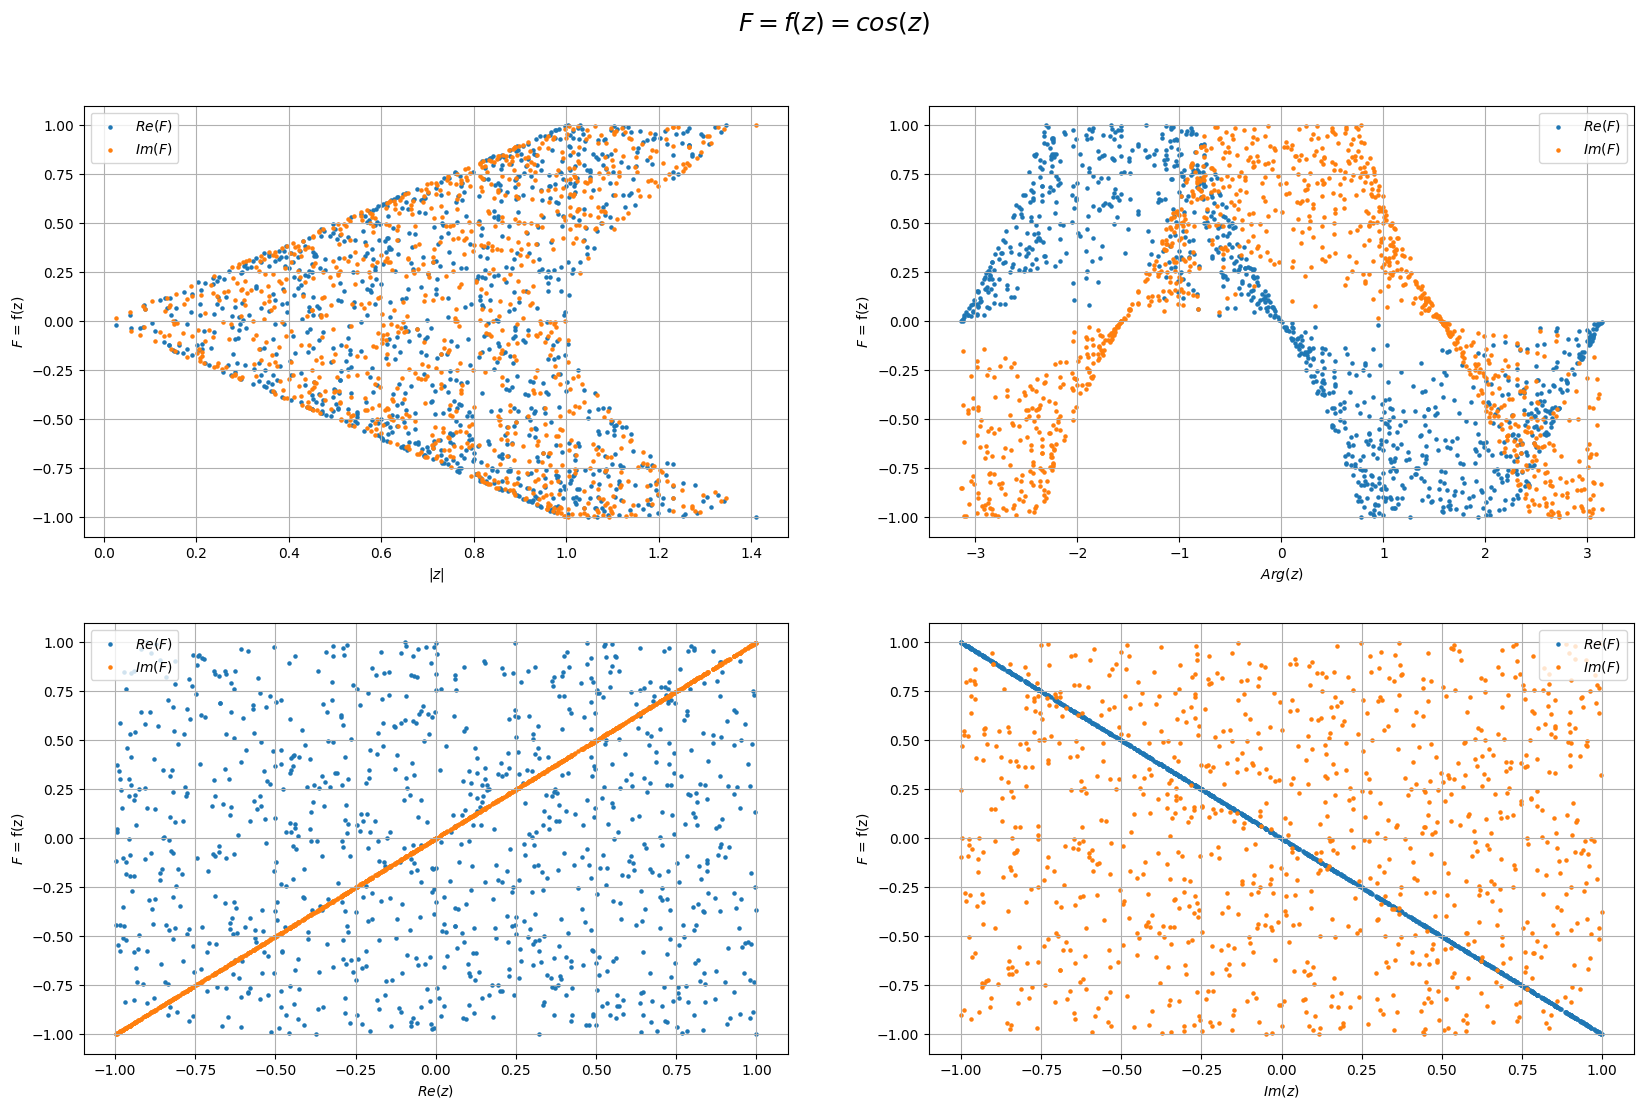

In [3]:
def plot_complex_function(x, y, title = None):
    
    plt.figure(figsize=(20,12))
    if title:
        plt.suptitle(title, fontsize=18)
        plt.subplots_adjust(top=0.90)
        

    plt.subplot(2, 2, 1)
    plt.scatter(np.abs(x), np.real(y), label='$Re(F)$', s=5)
    plt.scatter(np.abs(x), np.imag(y), label='$Im(F)$', s=5)
    plt.xlabel('$|z|$')
    plt.ylabel('$F$ = f(z)')
    plt.grid(True)
    plt.legend()

    plt.subplot(2, 2, 2)
    plt.scatter(np.angle(x), np.real(y), label='$Re(F)$', s=5)
    plt.scatter(np.angle(x), np.imag(y), label='$Im(F)$', s=5)
    plt.xlabel('$Arg(z)$')
    plt.ylabel('$F$ = f(z)')
    plt.grid(True)
    plt.legend()

    plt.subplot(2, 2, 3)
    plt.scatter(np.real(x), np.real(y), label='$Re(F)$', s=5)
    plt.scatter(np.real(x), np.imag(y), label='$Im(F)$', s=5)
    plt.xlabel('$Re(z)$')
    plt.ylabel('$F$ = f(z)')
    plt.grid(True)
    plt.legend()

    plt.subplot(2, 2, 4)
    plt.scatter(np.imag(x), np.real(y), label='$Re(F)$', s=5)
    plt.scatter(np.imag(x), np.imag(y), label='$Im(F)$', s=5)
    plt.xlabel('$Im(z)$')
    plt.ylabel('$F$ = f(z)')
    plt.grid(True)
    plt.legend()

    plt.show()
    
plot_complex_function(data, expected_output, '$F = f(z) = cos(z)$')

In [4]:
import pandas as pd
    
def make_dataframe(fit_history):
    df = pd.DataFrame(fit_history.history)
    df['epoch'] = fit_history.epoch
    return df
    
def plot_loss_history(fit_history, nn_type, threshold_multiplier = 10):

    df = make_dataframe(fit_history)
    print(f'{df.tail(5)}\n')

    train_1st_percentile = np.percentile(df['loss'].values, 1)
    val_1st_percentile = np.percentile(df['val_loss'].values, 1)
    print(f'1st percentile of train loss:       {train_1st_percentile:.4e}')
    print(f'1st percentile of validation loss:  {val_1st_percentile:.4e}')
    
    threshold = np.maximum(train_1st_percentile, val_1st_percentile)
    fig, axes = plt.subplots(3, sharex=True, figsize=(8,6))
    axes[0].set_title(f"{nn_type} loss history")
    for axis in axes:
        axis.set_ylim((0, threshold_multiplier*threshold))
        axis.plot(df['epoch'], df['loss'], label='training set')
        axis.plot(df['epoch'], df['val_loss'], linestyle='dashed', label='validation set')
        threshold_multiplier /= 2
    axes[-1].legend(loc="lower left")
    axes[-1].set_xlabel("epoch no.")
    # fig.supxlabel(f"min_train_loss: {1}\nmin_val_loss: {2}", y=-0.1, x, ha='right')
    fig.supylabel("loss value")


def plot_loss_history_comparision(rvnn_fit_history, cvnn_fit_history, scale_upper_bound = 1):
    
    rvnn_dataframe = make_dataframe(rvnn_fit_history)
    cvnn_dataframe = make_dataframe(cvnn_fit_history)
    
    upper_bound = 2*np.median(np.concatenate((rvnn_dataframe['loss'].values, rvnn_dataframe['val_loss'].values, cvnn_dataframe['loss'].values, cvnn_dataframe['val_loss'].values)))
    
    plt.figure()
    plt.ylim((0, scale_upper_bound*upper_bound))
    plt.plot(cvnn_dataframe['epoch'], cvnn_dataframe['loss'], label='CVNN training set')
    plt.plot(cvnn_dataframe['epoch'], cvnn_dataframe['val_loss'], linestyle='dashed', label='CVNN validation set')
    plt.plot(rvnn_dataframe['epoch'], rvnn_dataframe['loss'], label='RVNN training set')
    plt.plot(rvnn_dataframe['epoch'], rvnn_dataframe['val_loss'], linestyle='dashed', label='RVNN validation set')
    plt.legend(loc="lower left")
    plt.xlabel("epoch no.")
    plt.ylabel("loss value")
    plt.show()
    
# plot_loss_history_comparision(rvnn_df, cvnn_df)

In [75]:
EPOCH_NUM = 1000
VAL_RATIO = 0.2
VERBOSE_LVL = 1

from tensorflow.keras.optimizers import SGD, Adam
OPTIMIZER = lambda: SGD(learning_rate=0.005, momentum=0.00)
# OPTIMIZER = lambda: Adam()

## CVNN

In [76]:
import cvnn.layers as complex_layers
from cvnn.losses import ComplexMeanSquareError

def make_cvnn_model(verbose = False):
    model = tf.keras.models.Sequential()
    model.add(complex_layers.ComplexInput(input_shape=(1,)))
    model.add(complex_layers.ComplexDense(units=32, activation='cart_relu'))
    model.add(complex_layers.ComplexDense(units=1, activation='linear'))
    model.compile(loss=ComplexMeanSquareError(), optimizer=OPTIMIZER())
    if verbose:
        model.summary()
    return model

cvnn_model = make_cvnn_model(verbose=True)

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 complex_dense_18 (ComplexD  (None, 32)                128       
 ense)                                                           
                                                                 
 complex_dense_19 (ComplexD  (None, 1)                 66        
 ense)                                                           
                                                                 
Total params: 194 (776.00 Byte)
Trainable params: 194 (776.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### Liczba parametrów w CVNN
input: 1    -> 0

dense: 32   -> 2 * (32 * (1 + 1)) = 128

dense: 1    -> 2 * (1 * (32 + 1)) = 66

            sum: 128 + 66  = 194

In [77]:
cvnn_history = cvnn_model.fit(np.array(data), expected_output, epochs=EPOCH_NUM, validation_split=VAL_RATIO, verbose=VERBOSE_LVL)

Epoch 1/1000


25/25 [==============================] - 0s 4ms/step - loss: 0.4665 - val_loss: 0.2897
Epoch 2/1000
25/25 [==============================] - 0s 2ms/step - loss: 0.2192 - val_loss: 0.1357
Epoch 3/1000
25/25 [==============================] - 0s 2ms/step - loss: 0.1039 - val_loss: 0.0653
Epoch 4/1000
25/25 [==============================] - 0s 2ms/step - loss: 0.0518 - val_loss: 0.0340
Epoch 5/1000
25/25 [==============================] - 0s 2ms/step - loss: 0.0286 - val_loss: 0.0201
Epoch 6/1000
25/25 [==============================] - 0s 2ms/step - loss: 0.0183 - val_loss: 0.0139
Epoch 7/1000
25/25 [==============================] - 0s 2ms/step - loss: 0.0135 - val_loss: 0.0109
Epoch 8/1000
25/25 [==============================] - 0s 2ms/step - loss: 0.0111 - val_loss: 0.0093
Epoch 9/1000
25/25 [==============================] - 0s 2ms/step - loss: 0.0097 - val_loss: 0.0084
Epoch 10/1000
25/25 [==============================] - 0s 2ms/step - loss: 0.0088 - val_loss: 0.0077
Epoch 11/100

         loss  val_loss  epoch
795  0.000093  0.000111    795
796  0.000093  0.000111    796
797  0.000093  0.000111    797
798  0.000093  0.000110    798
799  0.000093  0.000110    799

1st percentile of train loss:       9.3404e-05
1st percentile of validation loss:  1.1121e-04


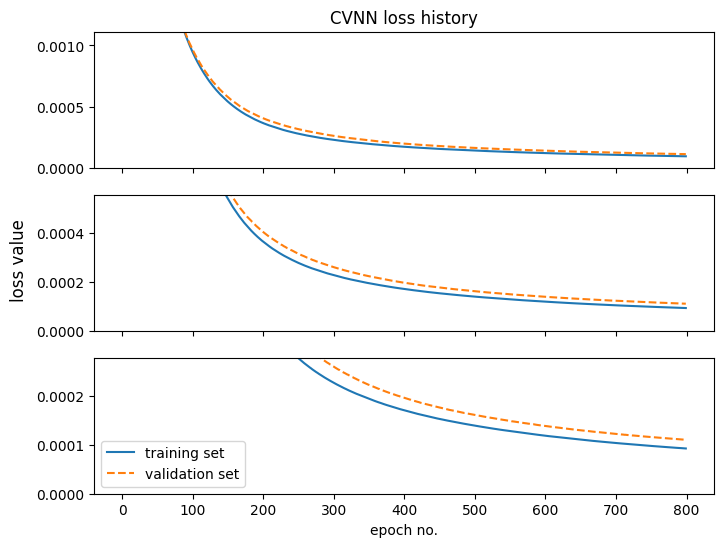

In [11]:
plot_loss_history(cvnn_history, "CVNN")

## RVNN

In [12]:
def convert_to_cartesian(complex):
    return np.array([(np.real(z), np.imag(z)) for z in complex])
rvnn_input = convert_to_cartesian(data)
rvnn_output = convert_to_cartesian(expected_output)

In [101]:
from tensorflow.keras.losses import MeanSquaredError

def make_rvnn_model(verbose = False):
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Input(shape=(2,)))
    model.add(tf.keras.layers.Dense(38, activation='relu'))
    model.add(tf.keras.layers.Dense(2))
    model.compile(loss=MeanSquaredError(), optimizer=OPTIMIZER())
    if verbose:
        model.summary()
    return model

rvnn_model = make_rvnn_model(verbose=True)

Model: "sequential_25"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_32 (Dense)            (None, 38)                114       
                                                                 
 dense_33 (Dense)            (None, 2)                 78        
                                                                 
Total params: 192 (768.00 Byte)
Trainable params: 192 (768.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### Liczba parametrów w RVNN
input: 2    -> 0

dense: 77   -> 77 * (2 + 1) = 231

dense: 2    -> 2 * (77 + 1) = 156

            sum: 231 + 156  = 387

In [102]:
rvnn_history = rvnn_model.fit(rvnn_input, rvnn_output, epochs=EPOCH_NUM, validation_split=VAL_RATIO, verbose=VERBOSE_LVL)

Epoch 1/1000


25/25 [==============================] - 0s 3ms/step - loss: 0.3824 - val_loss: 0.3368
Epoch 2/1000
25/25 [==============================] - 0s 1ms/step - loss: 0.3376 - val_loss: 0.2972
Epoch 3/1000
25/25 [==============================] - 0s 1ms/step - loss: 0.2997 - val_loss: 0.2635
Epoch 4/1000
25/25 [==============================] - 0s 1ms/step - loss: 0.2671 - val_loss: 0.2344
Epoch 5/1000
25/25 [==============================] - 0s 1ms/step - loss: 0.2386 - val_loss: 0.2092
Epoch 6/1000
25/25 [==============================] - 0s 1ms/step - loss: 0.2136 - val_loss: 0.1869
Epoch 7/1000
25/25 [==============================] - 0s 1ms/step - loss: 0.1915 - val_loss: 0.1673
Epoch 8/1000
25/25 [==============================] - 0s 1ms/step - loss: 0.1718 - val_loss: 0.1497
Epoch 9/1000
25/25 [==============================] - 0s 1ms/step - loss: 0.1541 - val_loss: 0.1340
Epoch 10/1000
25/25 [==============================] - 0s 1ms/step - loss: 0.1382 - val_loss: 0.1199
Epoch 11/100

         loss  val_loss  epoch
795  0.000599  0.000610    795
796  0.000597  0.000609    796
797  0.000596  0.000608    797
798  0.000595  0.000607    798
799  0.000594  0.000606    799

1st percentile of train loss:       6.0282e-04
1st percentile of validation loss:  6.1472e-04


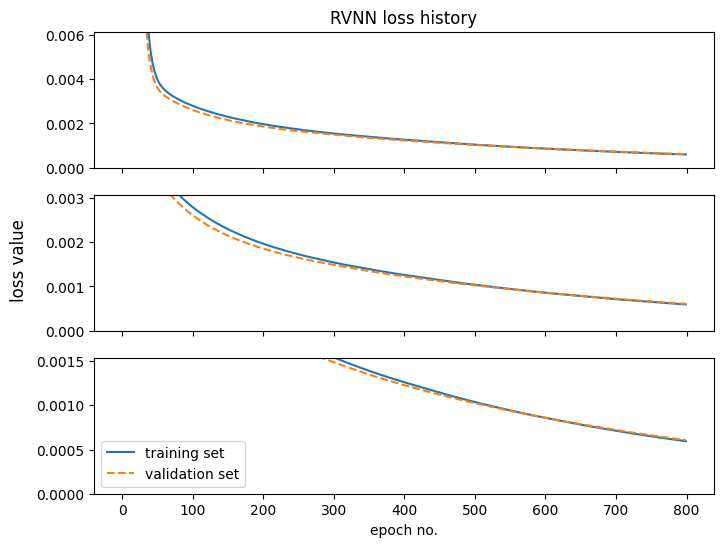

In [15]:
plot_loss_history(rvnn_history, "RVNN")

## Comparision

In [128]:
def plot_loss_history_comparision(rvnn_fit_history, cvnn_fit_history, scale_upper_bound = 1):
    
    rvnn_dataframe = make_dataframe(rvnn_fit_history)
    cvnn_dataframe = make_dataframe(cvnn_fit_history)
    
    upper_bound = 2*np.median(np.concatenate((rvnn_dataframe['loss'].values, rvnn_dataframe['val_loss'].values, cvnn_dataframe['loss'].values, cvnn_dataframe['val_loss'].values)))
    
    plt.figure(figsize=(8,4), dpi=300)
    plt.ylim((0, scale_upper_bound*upper_bound))
    plt.plot(cvnn_dataframe['epoch'], cvnn_dataframe['loss'], label='CVNN training set')
    plt.plot(cvnn_dataframe['epoch'], cvnn_dataframe['val_loss'], linestyle=(0, (5, 3)), label='CVNN validation set')
    plt.plot(rvnn_dataframe['epoch'], rvnn_dataframe['loss'], label='RVNN training set')
    plt.plot(rvnn_dataframe['epoch'], rvnn_dataframe['val_loss'], linestyle=(0, (5, 3)), label='RVNN validation set')
    plt.legend(loc="upper right")
    plt.xlabel("epoch no.")
    plt.ylabel("MSE")
    plt.ylim((0,0.0016))
    plt.grid(linestyle='--', linewidth=0.4)
    plt.show()

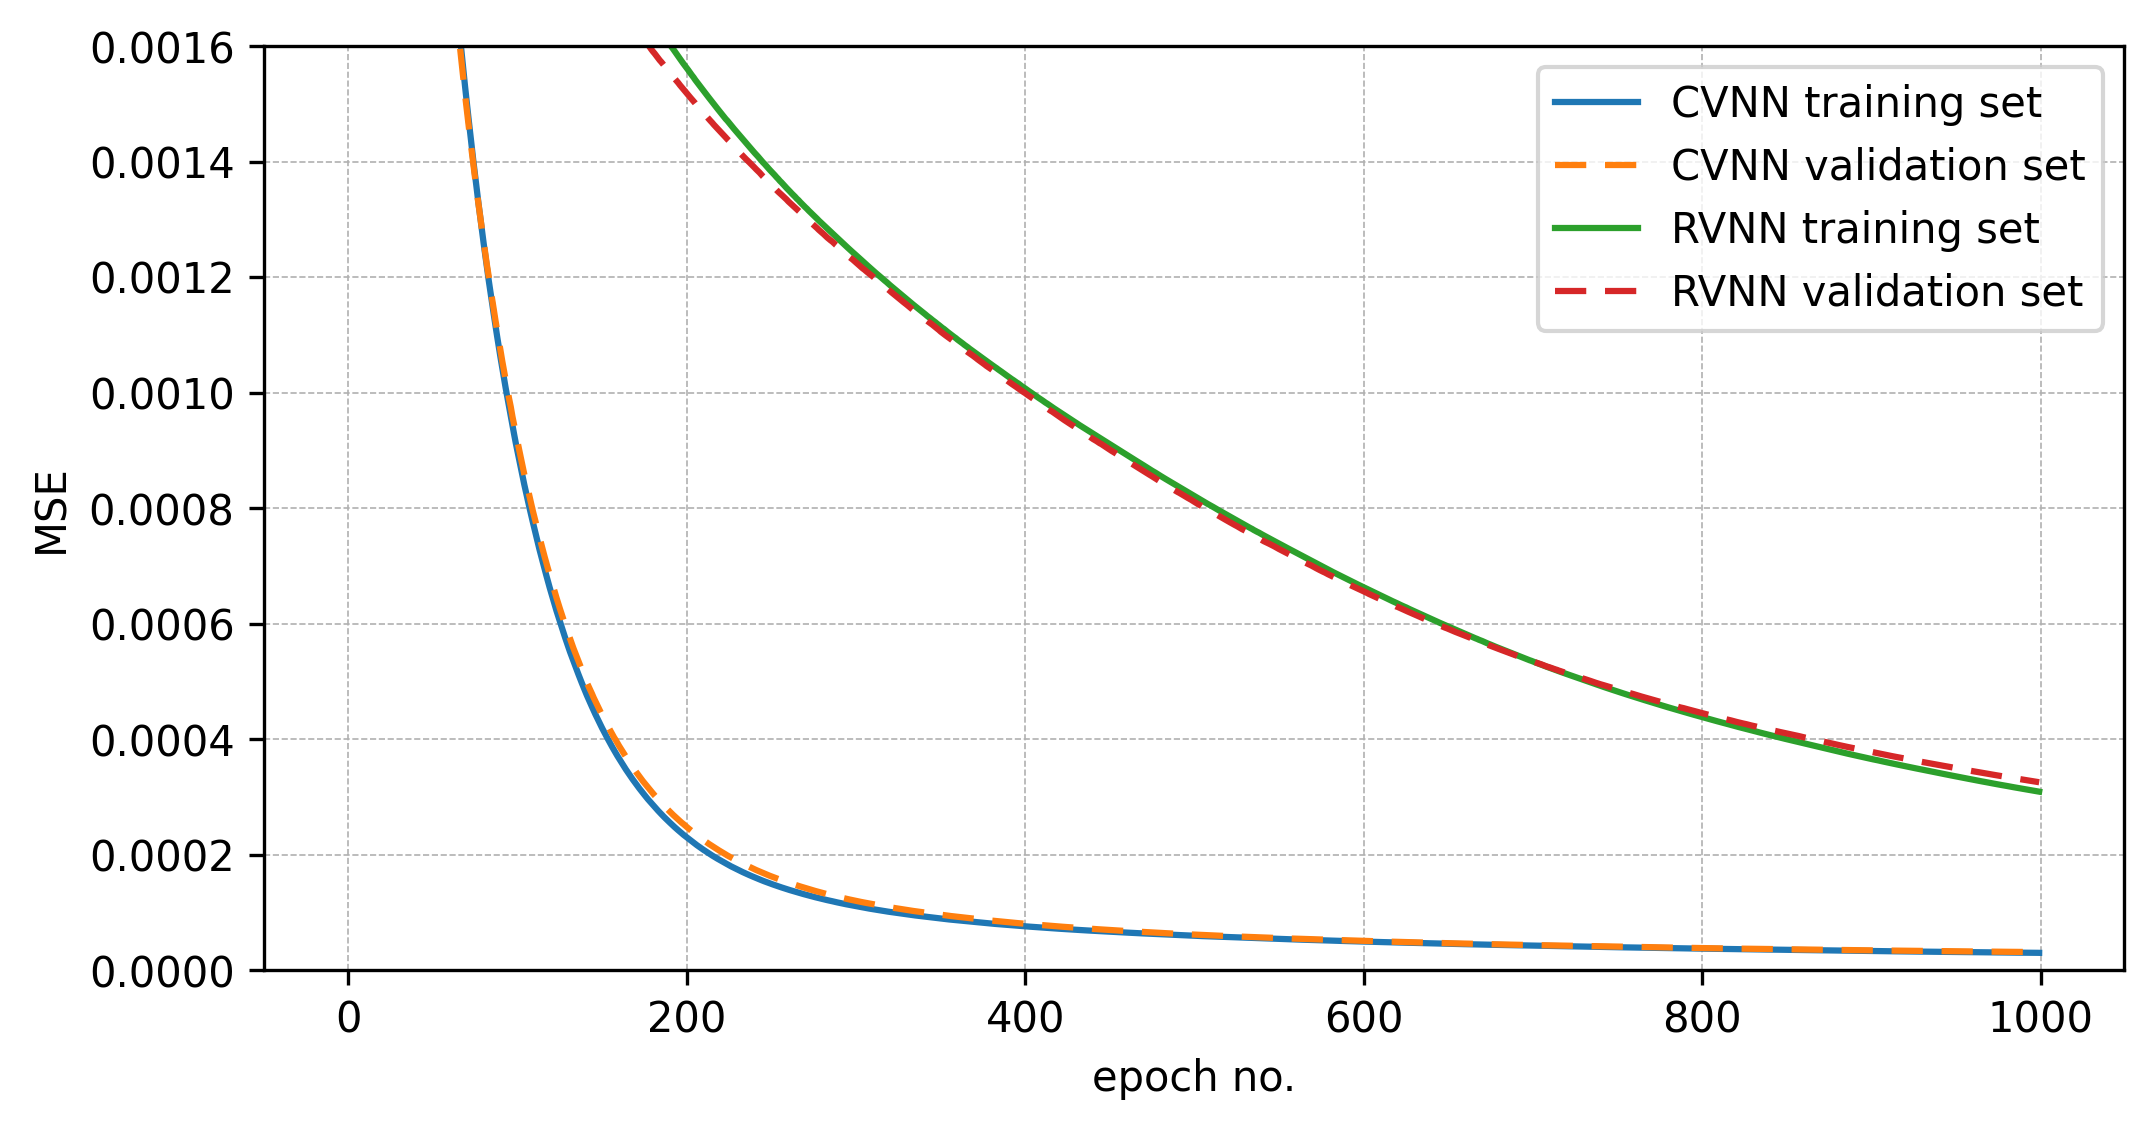

In [129]:
plot_loss_history_comparision(rvnn_history, cvnn_history, 2)

In [62]:
np.asarray(expected_output[:10])

array([ 0.97916652-0.09213088j, -0.44346479+0.24647281j,
        0.32698198+0.60850239j, -0.56610366-0.92876565j,
        0.26608737+0.9793434j , -0.96192651-0.60802361j,
        0.32031327-0.35605652j,  0.83335698-0.18661744j,
        0.16699705-0.54440427j, -0.98992341+0.64122905j])

In [63]:
np.asarray(cvnn_model.predict(data).flatten()[:10])

32/32 [==============================] - 0s 604us/step


array([ 0.97864383-0.09966637j, -0.44679818+0.25702572j,
        0.3362101 +0.6040906j , -0.5660278 -0.9328593j ,
        0.25549477+0.9789282j , -0.9568248 -0.6007161j ,
        0.31793362-0.34880337j,  0.83582187-0.18484321j,
        0.16760302-0.55079067j, -0.99042445+0.621701j  ], dtype=complex64)

In [69]:
rvnn_output[:10]

array([[ 0.97916652, -0.09213088],
       [-0.44346479,  0.24647281],
       [ 0.32698198,  0.60850239],
       [-0.56610366, -0.92876565],
       [ 0.26608737,  0.9793434 ],
       [-0.96192651, -0.60802361],
       [ 0.32031327, -0.35605652],
       [ 0.83335698, -0.18661744],
       [ 0.16699705, -0.54440427],
       [-0.98992341,  0.64122905]])

In [70]:
rvnn_model.predict(rvnn_input)[:10]

32/32 [==============================] - 0s 591us/step


array([[ 0.94549274, -0.11369133],
       [-0.48925546,  0.2690885 ],
       [ 0.32306176,  0.6376719 ],
       [-0.541919  , -0.9113881 ],
       [ 0.2530983 ,  0.9311423 ],
       [-0.90568984, -0.55642074],
       [ 0.35019857, -0.3880853 ],
       [ 0.810745  , -0.19367246],
       [ 0.17956819, -0.5829065 ],
       [-0.96479857,  0.6401523 ]], dtype=float32)

Epoch 1/800


25/25 [==============================] - 0s 3ms/step - loss: 0.3152 - val_loss: 0.2734
Epoch 2/800
25/25 [==============================] - 0s 1ms/step - loss: 0.2795 - val_loss: 0.2430
Epoch 3/800
25/25 [==============================] - 0s 1ms/step - loss: 0.2489 - val_loss: 0.2167
Epoch 4/800
25/25 [==============================] - 0s 1ms/step - loss: 0.2223 - val_loss: 0.1937
Epoch 5/800
25/25 [==============================] - 0s 1ms/step - loss: 0.1991 - val_loss: 0.1736
Epoch 6/800
25/25 [==============================] - 0s 1ms/step - loss: 0.1785 - val_loss: 0.1557
Epoch 7/800
25/25 [==============================] - 0s 1ms/step - loss: 0.1603 - val_loss: 0.1398
Epoch 8/800
25/25 [==============================] - 0s 1ms/step - loss: 0.1441 - val_loss: 0.1255
Epoch 9/800
25/25 [==============================] - 0s 1ms/step - loss: 0.1296 - val_loss: 0.1127
Epoch 10/800
25/25 [==============================] - 0s 1ms/step - loss: 0.1165 - val_loss: 0.1012
Epoch 11/800
25/25 [=

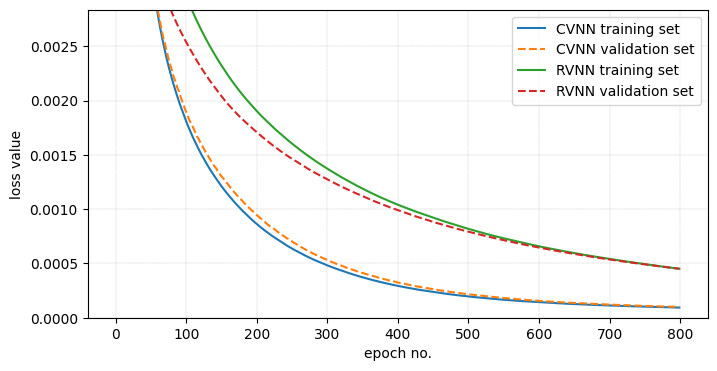

Epoch 1/800
25/25 [==============================] - 0s 3ms/step - loss: 0.3602 - val_loss: 0.3052
Epoch 2/800
25/25 [==============================] - 0s 1ms/step - loss: 0.3233 - val_loss: 0.2740
Epoch 3/800
25/25 [==============================] - 0s 1ms/step - loss: 0.2911 - val_loss: 0.2466
Epoch 4/800
25/25 [==============================] - 0s 1ms/step - loss: 0.2627 - val_loss: 0.2224
Epoch 5/800
25/25 [==============================] - 0s 1ms/step - loss: 0.2372 - val_loss: 0.2007
Epoch 6/800
25/25 [==============================] - 0s 1ms/step - loss: 0.2145 - val_loss: 0.1811
Epoch 7/800
25/25 [==============================] - 0s 1ms/step - loss: 0.1940 - val_loss: 0.1635
Epoch 8/800
25/25 [==============================] - 0s 1ms/step - loss: 0.1753 - val_loss: 0.1474
Epoch 9/800
25/25 [==============================] - 0s 1ms/step - loss: 0.1583 - val_loss: 0.1327
Epoch 10/800
25/25 [==============================] - 0s 1ms/step - loss: 0.1428 - val_loss: 0.1194
Epoch 11/

KeyboardInterrupt: 

In [26]:
learning_rate_list = [0.005, 0.01, 0.02]
momentum_list = [0., 0.01, 0.05, 0.2]

for learning_rate in learning_rate_list:
    for momentum in momentum_list:
        OPTIMIZER = lambda: SGD(jit_compile=True, learning_rate=learning_rate, momentum=momentum)
        
        rvnn_model = make_rvnn_model()
        rvnn_model.compile(loss=MeanSquaredError(), optimizer=OPTIMIZER())
        rvnn_history = rvnn_model.fit(rvnn_input, rvnn_output, epochs=EPOCH_NUM, validation_split=VAL_RATIO, verbose=VERBOSE_LVL)
        
        cvnn_model = make_cvnn_model()
        cvnn_model.compile(loss=ComplexMeanSquareError(), optimizer=OPTIMIZER())
        cvnn_history = cvnn_model.fit(np.array(data), expected_output, epochs=EPOCH_NUM, validation_split=VAL_RATIO, verbose=VERBOSE_LVL)
        
        print(f'macro parameters: learning_rate={learning_rate}, momentum={momentum}')
        plot_loss_history_comparision(rvnn_history, cvnn_history, 2)